[Return to Python Page](https://social-lorax.github.io/guides/index_py.html)

<img src="https://github.com/social-lorax/howto_codebooks/blob/master/images/logos/Pandas_logo.png?raw=true" style="width: 800px;">

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

In [ ]:
#pip install pandas 

In [ ]:
#pip install gapminder

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from  gapminder import gapminder

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

# Checking Data

### Contents

`.head()` returns the first few rows (the “head” of the DataFrame)

In [2]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


<br> 

`.info()` shows information on each of the columns, such as the data type and number of missing values

In [3]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


<br> 

`.shape` returns the number of rows and columns of the DataFrame

In [4]:
gapminder.shape

(1704, 6)

<br> 

`.columns` returns an index of column names

In [5]:
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

<br> 

`.unique()` gives a list of all of the unique values in a specified column

In [6]:
gapminder.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

<br>

### Summarizing

`.describe()` calculates a few summary statistics for each column

In [7]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


<br> 

`.value_counts()` counts categorical variables, with the argument `noramlize = True` providing the relative frequency

In [8]:
gapminder[gapminder["year"] == 2007]["continent"].value_counts()

Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: continent, dtype: int64

In [9]:
gapminder[gapminder["year"] == 2007]["continent"].value_counts(normalize = True)

Africa      0.366197
Asia        0.232394
Europe      0.211268
Americas    0.176056
Oceania     0.014085
Name: continent, dtype: float64

<br> 

`.pivot_table()` can be used to make crosstabs

In [10]:
conditions = [(gapminder["pop"].lt(4508000)),
             (gapminder["pop"].ge(4508000) & gapminder["pop"].le(31210000)),
             (gapminder["pop"].gt(31210000))]

choices = ["small", "average", "large"]

gapminder["size"] = np.select(conditions, choices)


gapminder[gapminder["year"] == 2007].pivot_table(values = "lifeExp", 
                                                 index = "continent", 
                                                 columns = "size", 
                                                 aggfunc = len,
                                                 fill_value = 0,
                                                 margins = True)

size,average,large,small,All
continent,,,,
Africa,25,10,17,52
Americas,13,6,6,25
Asia,14,13,6,33
Europe,17,7,6,30
Oceania,1,0,1,2
All,70,36,36,142


<br> 

`.groupby()` allows you to get summary statistics for grouped data

In [11]:
gapminder[gapminder["year"] > 1990].groupby(["continent", "year"])["lifeExp"].median()

continent  year
Africa     1992    52.4290
           1997    52.7590
           2002    51.2355
           2007    52.9265
Americas   1992    69.8620
           1997    72.1460
           2002    72.0470
           2007    72.8990
Asia       1992    68.6900
           1997    70.2650
           2002    71.0280
           2007    72.3960
Europe     1992    75.4510
           1997    76.1160
           2002    77.5365
           2007    78.6085
Oceania    1992    76.9450
           1997    78.1900
           2002    79.7400
           2007    80.7195
Name: lifeExp, dtype: float64

<br> 

### Missing Values

`.isna().sum()` returns the number of missing observations per column

In [12]:
gapminder.isna().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
size         0
dtype: int64

<br> 

`.dropna()` removes entire rows with missing values

In [13]:
gapminder = gapminder.dropna()

<br> 

`.fillna()` replaces all missing values with the specified value

In [14]:
gapminder = gapminder.fillna(0)

In [15]:
gapminder["country"] = gapminder["country"].fillna("Missing")

<br> 

### Duplicates

`.drop_duplicates()` will keep only the first instance of each value in the column(s) specified

In [16]:
gapminder.drop_duplicates("continent")

,country,continent,year,lifeExp,pop,gdpPercap,size
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,average
12,Albania,Europe,1952,55.230,1282697,1601.056136,small
24,Algeria,Africa,1952,43.077,9279525,2449.008185,average
48,Argentina,Americas,1952,62.485,17876956,5911.315053,average
60,Australia,Oceania,1952,69.120,8691212,10039.595640,average


In [17]:
gapminder.drop_duplicates(["continent", "year"]).head()

,country,continent,year,lifeExp,pop,gdpPercap,size
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,average
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,average
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,average
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,average
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,average


<br> 

### Outliers

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

# Wrangling

### Sorting

`.sort_values()` sorts based on a column (ascending), the argument `ascending = False` returns descending sorting

In [18]:
gapminder.sort_values(["country", "year"], ascending = [True, False]).head()

,country,continent,year,lifeExp,pop,gdpPercap,size
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,large
10,Afghanistan,Asia,2002,42.129,25268405,726.734055,average
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,average
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,average
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,average


<br> 

### Subsetting

In [19]:
gapminder[["country"]].head()

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan


In [20]:
gapminder[["country", "year", "lifeExp"]].head()

,country,year,lifeExp
0,Afghanistan,1952,28.801
1,Afghanistan,1957,30.332
2,Afghanistan,1962,31.997
3,Afghanistan,1967,34.020
4,Afghanistan,1972,36.088


In [21]:
gapminder.loc[[1, 3, 5], ["country", "year", "lifeExp"]]

,country,year,lifeExp
1,Afghanistan,1957,30.332
3,Afghanistan,1967,34.020
5,Afghanistan,1977,38.438


<br> 

### Indexing

In [22]:
gapminder_ind = gapminder[gapminder["year"] > 2000].set_index("continent")

gapminder_ind.loc["Asia"].head()

,country,year,lifeExp,pop,gdpPercap,size
continent,,,,,,
Asia,Afghanistan,2002,42.129,25268405,726.734055,average
Asia,Afghanistan,2007,43.828,31889923,974.580338,large
Asia,Bahrain,2002,74.795,656397,23403.559270,small
Asia,Bahrain,2007,75.635,708573,29796.048340,small
Asia,Bangladesh,2002,62.013,135656790,1136.390430,large


In [23]:
gapminder_ind = gapminder[gapminder["year"] > 2000].set_index(["continent", "country"])

gapminder_ind.loc[[("Asia", "Japan"),("Americas", "United States")]]

year  lifeExp        pop    gdpPercap   size
continent country                                                    
Asia      Japan          2002   82.000  127065841  28604.59190  large
          Japan          2007   82.603  127467972  31656.06806  large
Americas  United States  2002   77.310  287675526  39097.09955  large
          United States  2007   78.242  301139947  42951.65309  large

In [24]:
gapminder_ind.loc[[("Asia", "Japan"),("Americas", "United States")]].reset_index()

,continent,country,year,lifeExp,pop,gdpPercap,size
0,Asia,Japan,2002,82.000,127065841,28604.59190,large
1,Asia,Japan,2007,82.603,127467972,31656.06806,large
2,Americas,United States,2002,77.310,287675526,39097.09955,large
3,Americas,United States,2007,78.242,301139947,42951.65309,large


<br> 

### Filtering

In [25]:
gapminder[gapminder["lifeExp"] > 82]

,country,continent,year,lifeExp,pop,gdpPercap,size
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.97867,average
803,Japan,Asia,2007,82.603,127467972,31656.06806,large


In [26]:
gapminder[(gapminder["lifeExp"] > 82) | (gapminder["gdpPercap"] > 100000)]

,country,continent,year,lifeExp,pop,gdpPercap,size
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.97867,average
803,Japan,Asia,2007,82.603,127467972,31656.06806,large
852,Kuwait,Asia,1952,55.565,160000,108382.35290,small
853,Kuwait,Asia,1957,58.033,212846,113523.13290,small
856,Kuwait,Asia,1972,67.712,841934,109347.86700,small


In [27]:
gapminder[gapminder["continent"].isin(["Americas", "Oceania"])].head()

,country,continent,year,lifeExp,pop,gdpPercap,size
48,Argentina,Americas,1952,62.485,17876956,5911.315053,average
49,Argentina,Americas,1957,64.399,19610538,6856.856212,average
50,Argentina,Americas,1962,65.142,21283783,7133.166023,average
51,Argentina,Americas,1967,65.634,22934225,8052.953021,average
52,Argentina,Americas,1972,67.065,24779799,9443.038526,average


![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

# Columns 

### New 

In [28]:
gapminder["gdp"] = gapminder["gdpPercap"] * gapminder["pop"]

gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,size,gdp
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,average,6.567086e+09
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,average,7.585449e+09
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,average,8.758856e+09
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,average,9.648014e+09
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,average,9.678553e+09


![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

# Visualizing 

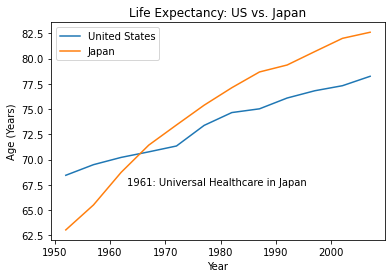

In [29]:
us_life = gapminder[gapminder.country == "United States"][["country", "year", "lifeExp"]]
japan_life = gapminder[gapminder.country == "Japan"][["country", "year", "lifeExp"]]

plt.plot(us_life.year, us_life.lifeExp, label = "United States")

plt.plot(japan_life.year, japan_life.lifeExp, label = "Japan")

plt.xlabel("Year")
plt.ylabel("Age (Years)")
plt.title("Life Expectancy: US vs. Japan")

plt.text(1963, 67.5, "1961: Universal Healthcare in Japan")

plt.legend()

plt.show()

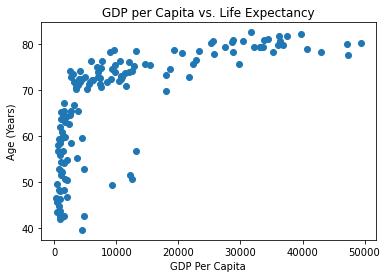

In [30]:
gap_07 = gapminder[gapminder.year == 2007]

plt.scatter(gap_07.gdpPercap, gap_07.lifeExp)

plt.xlabel("GDP Per Capita")
plt.ylabel("Age (Years)")
plt.title("GDP per Capita vs. Life Expectancy")

plt.show()